<a href="https://colab.research.google.com/github/DevashishX/Deep-Learning-Models/blob/master/DLAZ_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network using Keras

always use tensorflow.keras instead of just keras


# Read the Data

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding Data


In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
print(X, X.shape)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]] (10000, 10)


## One hot encoder

In [0]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = columnTransformer.fit_transform(X)
print(X, X.shape)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]] (10000, 12)


### Dummy variable trap

In [0]:
X = X[:, 1:]
print(X[0], X.shape)

[0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88] (10000, 11)


# Train Test Split


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ANN

In [0]:
# import tensorflow.keras 
%tensorflow_version 2.x

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


## Check if GPU is enabled for keras

In [0]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [0]:
classifier = Sequential()

In [0]:
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu", input_dim = 11))

In [0]:
classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))

In [0]:
classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))

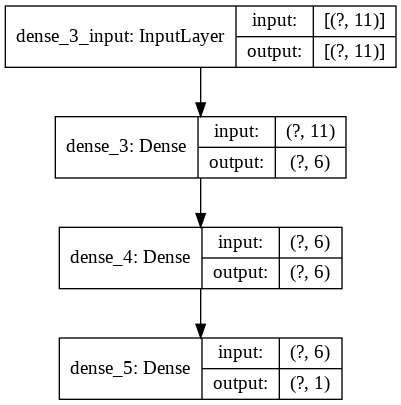

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, show_layer_names=True)

## Compiling the model

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model

In [0]:
%%time
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4847 - accuracy: 0.7949
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8149
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4166 - accuracy: 0.8244
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8310
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8313
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4115 - accuracy: 0.8314
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8321
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4094 - accura

In [0]:
# using keras
# CPU times: user 4min 2s, sys: 22.2 s, total: 4min 24s
# Wall time: 3min 24s

# <keras.callbacks.callbacks.History at 0x7ff5a9de3358>

In [0]:
# using tensorflow.keras
# CPU times: user 2min 33s, sys: 15.3 s, total: 2min 49s
# Wall time: 2min 20s

# <tensorflow.python.keras.callbacks.History at 0x7ff5a9bff0f0>

# Predict 

In [0]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

### Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix ", cm, sep="\n")

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score ", acc, sep="\n")

Confusion Matrix 
[[1548   47]
 [ 270  135]]
Accuracy Score 
0.8415


# Cross Validation

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu", input_dim = 11))
    classifier.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
    classifier.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [0]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size = 10, epochs=100)

In [0]:
accuracies = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
mean = accuracies.mean()
variance = accuracies.std()
print("Mean: ", mean, " Variance: ", variance)

Mean:  0.8383750021457672  Variance:  0.011167048261253839


In [0]:
max(accuracies)

0.8587499856948853

# Tuning

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [0]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier


In [0]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25, 50],
              'epochs': [100, 500, 50],
              'optimizer': ['adam', 'rmsprop']}


In [0]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs=-1)

In [0]:
with tf.device('/device:GPU:0'):
    grid_search = grid_search.fit(X_train, y_train)
    best_parameters = grid_search.best_params_
    best_accuracy = grid_search.best_score_

In [0]:
print("Best Params: {} Best accuracy: {}".format(best_parameters, best_accuracy))

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))